![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [27]:
import pandas as pd
import numpy as np
#pip install --upgrade openpyxl

In [28]:
df = pd.read_excel("BBDD_Hospitalización.xlsx")
df.head()

C:\Users\Anabel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,75,NO,NO,25.0,NO,SI,FLUOROQUINOLONA_AMINOGLICÓSIDO,12,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0,0
1,77,NO,NO,91.8,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 10,NO,NO,NO,NO,NO,NO,NO,0,0
2,75,NO,NO,21.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NO,0,0
3,77,NO,NO,98.0,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,6,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 10,NO,NO,NO,NO,NO,NO,NO,0,0
4,73,NO,NO,7.5,NO,SI,CEFALOSPORINA_AMINOGLUCOCIDO,12,NO,"SI, ASMA",NEG,NO,NO,NO,NO,NO,NO,NO,0,0


In [29]:
df.shape

(568, 20)

In [30]:
#Revisamos los tipos de datos de las variables del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       568 non-null    int64  
 1   DIABETES                                                                   568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 568 non-null    object 
 3   PSA                                                                        564 non-null    float64
 4   BIOPSIAS PREVIAS                                                           566 non-null    object 
 5   VOLUMEN PROSTATICO                                                         567 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

> Cambiamos el tipo de la variable *NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA* a entero ya que se refiere a días.

In [31]:
df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'] = pd.to_numeric(df['NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA'], errors='coerce').astype('Int64')

Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

In [32]:
df.columns

Index(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'NUMERO DE MUESTRAS TOMADAS',
       'CUP', 'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA',
       'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
       'FIEBRE', 'ITU', 'TIPO DE CULTIVO', 'AGENTE AISLADO',
       'PATRON DE RESISTENCIA', 'HOSPITALIZACION', 'DIAS HOSPITALIZACION MQ',
       'DIAS HOSPITALIZACIÓN UPC'],
      dtype='object')

| Variable a eliminar                                                    | Sustento                                                                                                                                                          |
|--------------------------------------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 'BIOPSIA'                                                    | No nos interesa el resultado de la biopsia del paciente, sino las características que tiene un paciente que termina hospitalizado.                                |
| 'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA' | Tenemos una variable que nos indica si el paciente fue hospitalizado o no dentro de los 30 días post biopsia, no nos importa en qué día sucedió.                 |
| 'DIAS HOSPITALIZACION MQ' y 'DIAS HOSPITALIZACIÓN UPC'       | No estudiamos el tiempo que el paciente pasa hospitalizado, solo si es hospitalizado o no.                                                                        |
| 'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS'                     | Nuestro cliente desea saber las características más importantes que tienen los pacientes que terminan en hospitalización. Esta variable no es una característica propia del paciente sino de la forma en que se realizó la biopsia. |
| 'NUMERO DE MUESTRAS TOMADAS'                                  | Nuestro cliente desea saber las características más importantes que tienen los pacientes que terminan en hospitalización. Esta variable no es una característica propia del paciente sino de la forma en que se realizó la biopsia. |
| 'TIPO DE CULTIVO' y 'AGENTE AISLADO'                         | No es importante al objetivo.                                                                                                                                     |
| 'PATRON DE RESISTENCIA'                                       | No es importante, tiene el mismo valor en toda la columna.                                                                                                        |
|'FIEBRE' y 'ITU'               | Ya tenemos una variable que nos indica si el paciente fue hospitalizado o no, estas variables nos indica los síntomas que el paciente presentó.

In [33]:
eliminar = [
    'BIOPSIA',
    'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
    'DIAS HOSPITALIZACION MQ',
    'DIAS HOSPITALIZACIÓN UPC',
    'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS',
    'NUMERO DE MUESTRAS TOMADAS',
    'TIPO DE CULTIVO',
    'AGENTE AISLADO',
    'PATRON DE RESISTENCIA',
    'FIEBRE',
    'ITU'
]

In [34]:
# Eliminamos las columnas
data = df.drop(columns=eliminar)

In [36]:
# Nos quedamos con 8 variables relacionadas a características propias del paciente
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 9 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   EDAD                               568 non-null    int64  
 1   DIABETES                           568 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES         568 non-null    object 
 3   PSA                                564 non-null    float64
 4   BIOPSIAS PREVIAS                   566 non-null    object 
 5   VOLUMEN PROSTATICO                 567 non-null    object 
 6   CUP                                567 non-null    object 
 7   ENF. CRONICA PULMONAR OBSTRUCTIVA  566 non-null    object 
 8   HOSPITALIZACION                    565 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 40.1+ KB


In [38]:
data.columns

Index(['EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'CUP',
       'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'HOSPITALIZACION'],
      dtype='object')

In [41]:
# Cambiamos los nombres por claridad y entendimiento. Además, nos facilita el análisis y así reducimos la posibilidad de confusiones. 
new_names = {
    'EDAD': 'Edad',
    'DIABETES': 'Diabetes',
    'HOSPITALIZACIÓN ULTIMO MES': 'Hospitalizado_Ultimo_Mes',
    'PSA': 'Concentracion_PSA',
    'BIOPSIAS PREVIAS': 'Biopsia_Previa',
    'VOLUMEN PROSTATICO': 'Volumen_Prostatico_Mayor_a_40',
    'CUP': 'Cateter_Urinario',
    'ENF. CRONICA PULMONAR OBSTRUCTIVA': 'Enfermedad_cronica_pulmonar',
    'HOSPITALIZACION': 'Hospitalizado_Post_Proc'
}

data = data.rename(columns = new_names)
data.head()

In [43]:
# Ahora tenemos un conjunto de datos con nombres coherentes es más fácil de trabajar y entender.
data.columns

Index(['Edad', 'Diabetes', 'Hospitalizado_Ultimo_Mes', 'Concentracion_PSA',
       'Biopsia_Previa', 'Volumen_Prostatico_Mayor_a_40', 'Cateter_Urinario',
       'Enfermedad_cronica_pulmonar', 'Hospitalizado_Post_Proc'],
      dtype='object')

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, 0 to 567
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Edad                           566 non-null    int64  
 1   Diabetes                       566 non-null    object 
 2   Hospitalizado_Ultimo_Mes       566 non-null    object 
 3   Concentracion_PSA              562 non-null    float64
 4   Biopsia_Previa                 564 non-null    object 
 5   Volumen_Prostatico_Mayor_a_40  565 non-null    object 
 6   Cateter_Urinario               565 non-null    object 
 7   Enfermedad_cronica_pulmonar    564 non-null    object 
 8   Hospitalizado_Post_Proc        563 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 44.2+ KB


> Identificamos tipos de variables

| Nombre de variable               | Tipo de variable   |
|-----------------------------------|--------------------|
| Edad                              | Numérica            |
| Concentracion_PSA                 | Numérica            |
| Diabetes                          | Categórica          |
| Hospitalizado_Ultimo_Mes          | Categórica          |
| Biopsia_Previa                    | Categórica          |
| Volumen_Prostatico_Mayor_a_40     | Categórica          |
| Cateter_Urinario                  | Categórica          |
| Enfermedad_cronica_pulmonar       | Categórica          |
| Hospitalizado_Post_Proc           | Categórica          |


Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

In [45]:
# Tenemos 2 variables numéricas 'Edad y 'Concentracion_PSA'
data.describe()

,Edad,Concentracion_PSA
count,568.000000,564.000000
mean,63.882042,13.271401
std,9.281517,15.668966
min,39.000000,0.600000
25%,59.000000,5.600000
50%,64.000000,8.000000
75%,69.000000,15.000000
max,151.000000,100.000000


In [ ]:
# La edad promedio de los pacientes es de 63 años y la mínima de 39 años. Vemos datos atípicos de la edad máxima que es 151 años.
# Con respecto a la concentración de PSA, Los resultados normalmente se indican en nanogramos de PSA por mililitro de sangre (ng/ml).
# En general cuanto más alta sea la concentración del PSA, más probable es que la persona tenga cáncer de próstata. 
# El minimo PSA regsitrado es de 0.6, el maximo es de 100 y la media es de 13.

In [52]:
import matplotlib.pyplot as plt 
import seaborn as sns

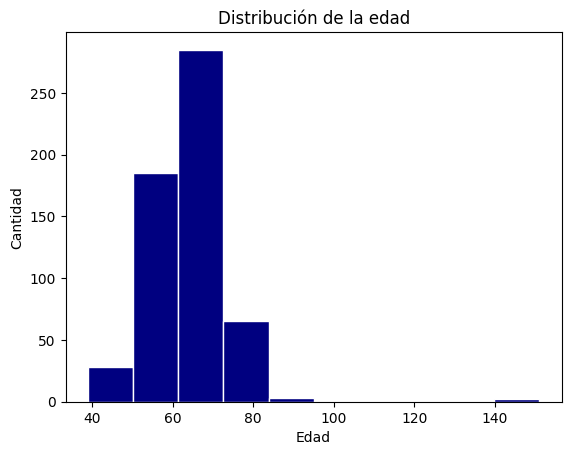

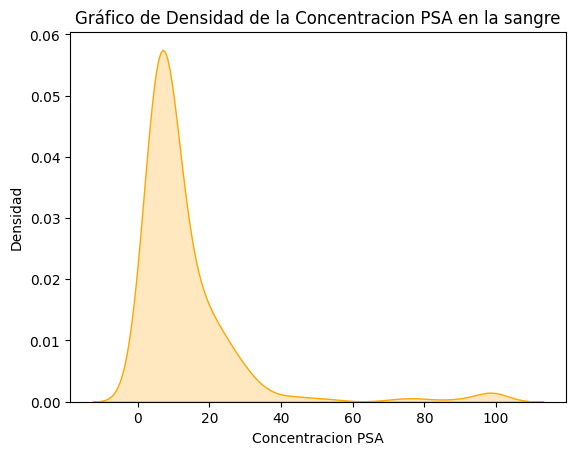

In [53]:
# Edad
plt.hist(data['Edad'], bins=10, edgecolor='w', color='navy')
plt.title("Distribución de la edad")
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.show()

# Concentraccion PSA
sns.kdeplot(data['Concentracion_PSA'], fill=True, color='orange')
plt.title('Gráfico de Densidad de la concentracion del PSA en la sangre')
plt.xlabel('Concentracion PSA')
plt.ylabel('Densidad')
plt.show()

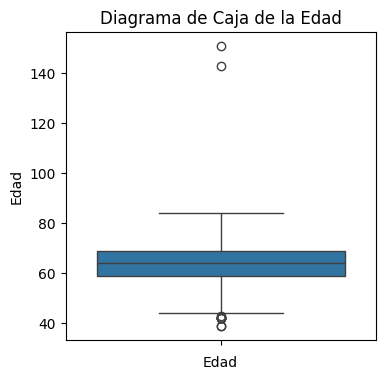

In [67]:
plt.figure(figsize=(4,4))
sns.boxplot(data['Edad'])
plt.title('Diagrama de Caja de la Edad')
plt.xlabel('Edad')
plt.show()

Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

> Dado que hay atípicos en la variable *Edad* , los identificaremos y serán eliminados según conveniencia

In [72]:
# Calculamos los cuartiles
Q1 = data['Edad'].quantile(0.25)
Q3 = data['Edad'].quantile(0.75)

# Calculamos el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definimos los límites para identificar los valores atípicos de la EDAD
umbral_inferior = Q1 - 1.5 * IQR
umbral_superior = Q3 + 1.5 * IQR

# Mostramos
valores_atipicos = data[(data['Edad'] < umbral_inferior) | (data['Edad'] > umbral_superior)]
valores_atipicos

,Edad,Diabetes,Hospitalizado_Ultimo_Mes,Concentracion_PSA,Biopsia_Previa,Volumen_Prostatico_Mayor_a_40,Cateter_Urinario,Enfermedad_cronica_pulmonar,Hospitalizado_Post_Proc
29,42,NO,NO,8.5,NO,NO,NO,NO,NO
30,42,NO,NO,53.0,NO,NO,NO,NO,NO
133,42,NO,NO,6.0,NO,NO,NO,NO,NO
135,143,SI,NO,6.8,NO,NO,NO,NO,NO
155,151,NO,NO,5.7,NO,SI,NO,NO,NO
198,39,NO,NO,3.6,NO,NO,NO,NO,NO
283,42,NO,NO,8.5,NO,NO,NO,NO,NO
284,42,NO,NO,54.0,NO,NO,NO,NO,NO
388,42,NO,NO,6.0,NO,NO,NO,NO,NO
455,39,NO,NO,3.9,NO,NO,NO,NO,NO


In [77]:
# Solo eliminaré las filas con edades mayores a 100, 2 filas con 151 y 143 años. Estos valores son extremos.
data = data.loc[data['Edad'] <= 100]
data.shape

(566, 9)

Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

In [79]:
data.columns

Index(['Edad', 'Diabetes', 'Hospitalizado_Ultimo_Mes', 'Concentracion_PSA',
       'Biopsia_Previa', 'Volumen_Prostatico_Mayor_a_40', 'Cateter_Urinario',
       'Enfermedad_cronica_pulmonar', 'Hospitalizado_Post_Proc'],
      dtype='object')

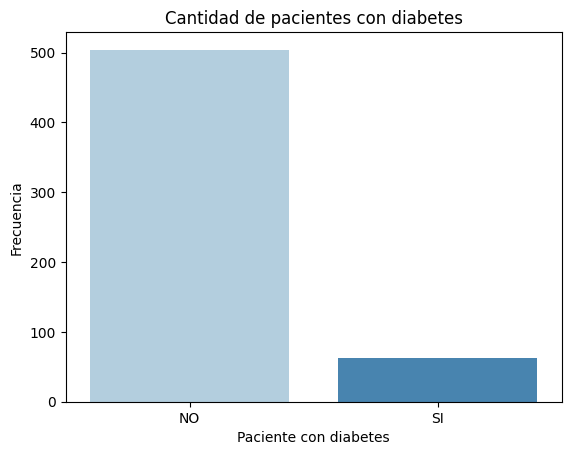

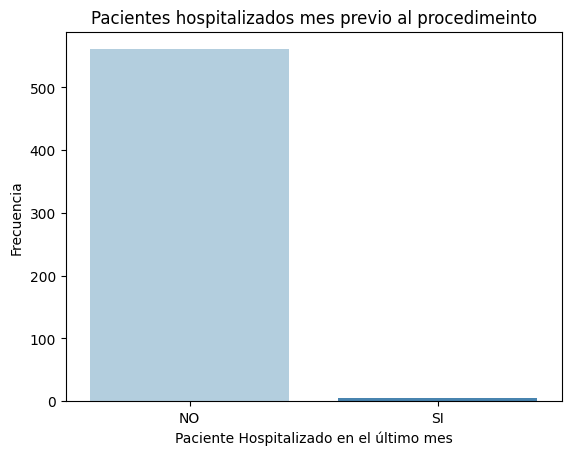

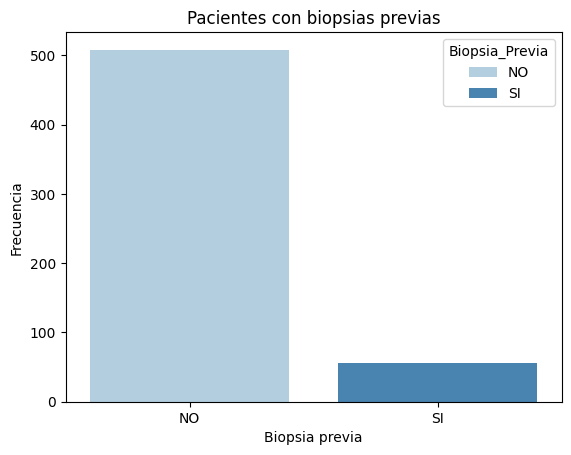

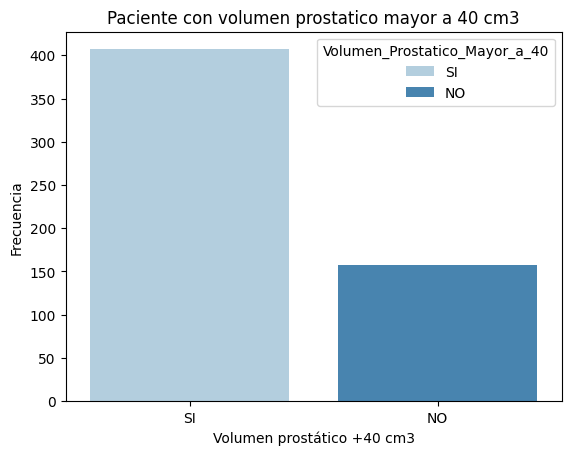

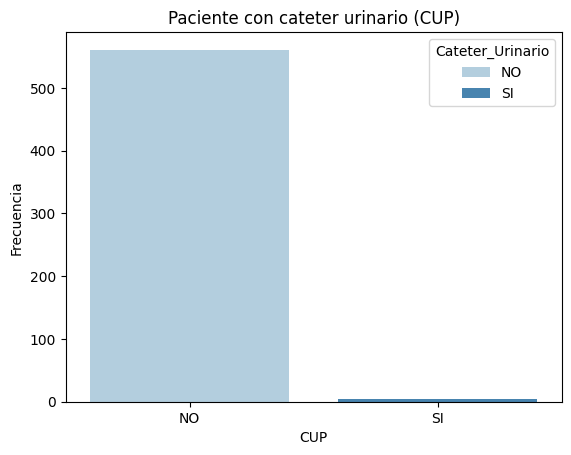

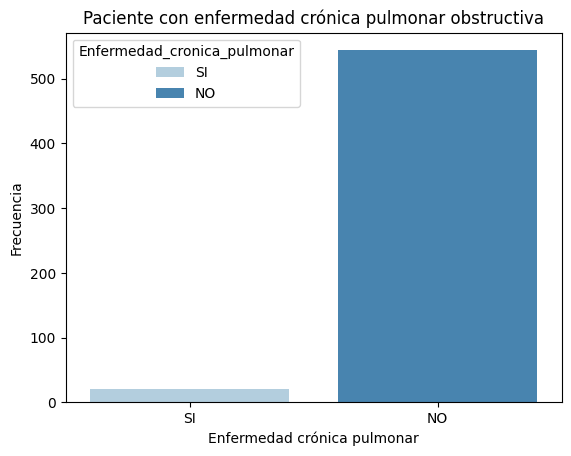

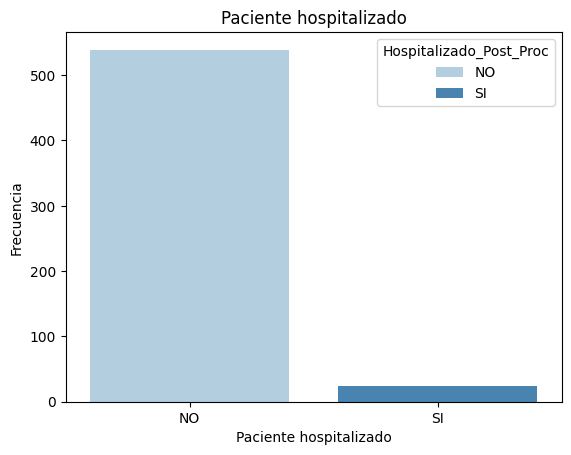

In [104]:
# Diabetes
sns.countplot(x='Diabetes', data=data, hue='Diabetes', palette="Blues")
plt.title('Cantidad de pacientes con diabetes')
plt.xlabel('Paciente con diabetes')
plt.ylabel('Frecuencia')
plt.show()

# 'Hospitalizado_Ultimo_Mes'
sns.countplot(x='Hospitalizado_Ultimo_Mes', data=data, hue='Hospitalizado_Ultimo_Mes', palette="Blues")
plt.title('Pacientes hospitalizados mes previo al procedimeinto')
plt.xlabel('Paciente Hospitalizado en el último mes')
plt.ylabel('Frecuencia')
plt.show()

# 'Biopsia_Previa'
sns.countplot(x='Biopsia_Previa', data=data, hue='Biopsia_Previa', palette="Blues")
plt.title('Pacientes con biopsias previas')
plt.xlabel('Biopsia previa')
plt.ylabel('Frecuencia')
plt.show()

# 'Volumen_Prostatico_Mayor_a_40'
sns.countplot(x='Volumen_Prostatico_Mayor_a_40', data=data, hue='Volumen_Prostatico_Mayor_a_40', palette="Blues")
plt.title('Paciente con volumen prostatico mayor a 40 cm3')
plt.xlabel('Volumen prostático +40 cm3')
plt.ylabel('Frecuencia')
plt.show()

# 'Cateter_Urinario',
sns.countplot(x='Cateter_Urinario', data=data, hue='Cateter_Urinario', palette="Blues")
plt.title('Paciente con cateter urinario (CUP)')
plt.xlabel('CUP')
plt.ylabel('Frecuencia')
plt.show()

# 'Enfermedad_cronica_pulmonar'
sns.countplot(x='Enfermedad_cronica_pulmonar', data=data, hue='Enfermedad_cronica_pulmonar', palette="Blues")
plt.title('Paciente con enfermedad crónica pulmonar obstructiva')
plt.xlabel('Enfermedad crónica pulmonar')
plt.ylabel('Frecuencia')
plt.show()

# 'Hospitalizado_Post_Proc
sns.countplot(x='Hospitalizado_Post_Proc', data=data, hue='Hospitalizado_Post_Proc', palette="Blues")
plt.title('Paciente hospitalizado')
plt.xlabel('Paciente hospitalizado')
plt.ylabel('Frecuencia')
plt.show()

In [102]:
# Estandarizamos los datos de la varibale 'Enfermedad_Cronica_Pulmonar'
data['Enfermedad_cronica_pulmonar'] = data['Enfermedad_cronica_pulmonar'].replace(['SI, EPOC', 'SI, ASMA'], 'SI')

Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

In [107]:
data.isnull().sum() # Tenemos 6 variables con nulos

Edad                             0
Diabetes                         0
Hospitalizado_Ultimo_Mes         0
Concentracion_PSA                4
Biopsia_Previa                   2
Volumen_Prostatico_Mayor_a_40    1
Cateter_Urinario                 1
Enfermedad_cronica_pulmonar      2
Hospitalizado_Post_Proc          3
dtype: int64

> Tratamiento de nulos de la variable <span style="background-color: navy;">Concentracion_PSA</span>

In [106]:
data.loc[data['Concentracion_PSA'].isnull()]

,Edad,Diabetes,Hospitalizado_Ultimo_Mes,Concentracion_PSA,Biopsia_Previa,Volumen_Prostatico_Mayor_a_40,Cateter_Urinario,Enfermedad_cronica_pulmonar,Hospitalizado_Post_Proc
50,57,NO,NO,NaN,NO,NO,NO,NO,NO
77,60,NO,NO,NaN,SI,SI,NO,NO,NO
95,62,NO,NO,NaN,NO,SI,NO,NO,NO
558,44,NO,NO,NaN,NO,NO,NO,NO,SI


In [113]:
# Como vimos anteriormente, la distribución de esta variable es asimétrica y tiene valores que lo pueden sesgar a un número mayor
# Optamos por aplicar la MEDIANA
data['Concentracion_PSA'] = data['Concentracion_PSA'].fillna(data['Concentracion_PSA'].median())

> Tratamiento de nulos de la variable <span style="background-color: navy;">Biopsia_Previa</span>

In [108]:
data.loc[data['Biopsia_Previa'].isnull()]

,Edad,Diabetes,Hospitalizado_Ultimo_Mes,Concentracion_PSA,Biopsia_Previa,Volumen_Prostatico_Mayor_a_40,Cateter_Urinario,Enfermedad_cronica_pulmonar,Hospitalizado_Post_Proc
66,58,NO,NO,7.80,NaN,SI,NO,NO,NO
539,69,NO,NO,4.43,NaN,NaN,NaN,NO,NO


In [116]:
# Observamos los datos
data['Biopsia_Previa'].value_counts()

Biopsia_Previa
NO    508
SI     56
Name: count, dtype: int64

In [117]:
# Optamos por reemplazar los datos con Sin Dato
data['Biopsia_Previa'] = data['Biopsia_Previa'].fillna('Sin Dato')

> Tratamiento de nulos de la variable <span style="background-color: navy;">Volumen_Prostatico_Mayor_a_40</span>

In [109]:
data.loc[data['Volumen_Prostatico_Mayor_a_40'].isnull()]

,Edad,Diabetes,Hospitalizado_Ultimo_Mes,Concentracion_PSA,Biopsia_Previa,Volumen_Prostatico_Mayor_a_40,Cateter_Urinario,Enfermedad_cronica_pulmonar,Hospitalizado_Post_Proc
539,69,NO,NO,4.43,NaN,NaN,NaN,NO,NO


In [118]:
data['Volumen_Prostatico_Mayor_a_40'].value_counts()

Volumen_Prostatico_Mayor_a_40
SI    407
NO    158
Name: count, dtype: int64

In [120]:
# Se optará por eliminar la fila con el dato nulo
data = data.dropna(subset=['Volumen_Prostatico_Mayor_a_40'])

> Tratamiento de nulos de la variable <span style="background-color: navy;">Cateter_Urinario</span>

In [122]:
# Se elimino con el código anterior

> Tratamiento de nulos de la variable <span style="background-color: navy;">Enfermedad_cronica_pulmonar</span>

In [123]:
data.loc[data['Enfermedad_cronica_pulmonar'].isnull()]

,Edad,Diabetes,Hospitalizado_Ultimo_Mes,Concentracion_PSA,Biopsia_Previa,Volumen_Prostatico_Mayor_a_40,Cateter_Urinario,Enfermedad_cronica_pulmonar,Hospitalizado_Post_Proc
540,67,NO,NO,8.0,NO,SI,NO,NaN,NO
541,59,NO,NO,9.0,SI,SI,NO,NaN,NO


In [124]:
data['Enfermedad_cronica_pulmonar'].value_counts()

Enfermedad_cronica_pulmonar
NO    543
SI     20
Name: count, dtype: int64

In [127]:
# Optamos por reemplazar los datos con Sin Dato
data['Enfermedad_cronica_pulmonar'] = data['Enfermedad_cronica_pulmonar'].fillna('Sin Dato')

C:\Users\Anabel\AppData\Local\Temp\ipykernel_62908\3849485851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Enfermedad_cronica_pulmonar'] = data['Enfermedad_cronica_pulmonar'].fillna('Sin Dato')


> Tratamiento de nulos de la variable <span style="background-color: navy;">Hospitalizado_Post_Proc</span>

In [112]:
data.loc[data['Hospitalizado_Post_Proc'].isnull()]

,Edad,Diabetes,Hospitalizado_Ultimo_Mes,Concentracion_PSA,Biopsia_Previa,Volumen_Prostatico_Mayor_a_40,Cateter_Urinario,Enfermedad_cronica_pulmonar,Hospitalizado_Post_Proc
5,63,NO,NO,10.8,NO,NO,NO,SI,NaN
74,74,NO,NO,5.8,NO,NO,NO,NO,NaN
83,61,NO,NO,7.0,NO,NO,NO,NO,NaN


In [129]:
# En este caso, se completará con 'NO', tomando en cuenta la mayoría de los datos y 
# las otras variables: DIAS HOSPITALIZACION MQ y DIAS HOSPITALIZACIÓN UPC que indican 0 días.
data['Hospitalizado_Post_Proc'] = data['Hospitalizado_Post_Proc'].fillna('NO')

C:\Users\Anabel\AppData\Local\Temp\ipykernel_62908\3853212347.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Hospitalizado_Post_Proc'] = data['Hospitalizado_Post_Proc'].fillna('No')


In [130]:
data.isnull().sum()

Edad                             0
Diabetes                         0
Hospitalizado_Ultimo_Mes         0
Concentracion_PSA                0
Biopsia_Previa                   0
Volumen_Prostatico_Mayor_a_40    0
Cateter_Urinario                 0
Enfermedad_cronica_pulmonar      0
Hospitalizado_Post_Proc          0
dtype: int64

Para el caso de las variables numéricas, ¿Es necesario normalizar?

In [183]:
data1 = data.copy()
data1.head()

,Edad,Diabetes,Hospitalizado_Ultimo_Mes,Concentracion_PSA,Biopsia_Previa,Volumen_Prostatico_Mayor_a_40,Cateter_Urinario,Enfermedad_cronica_pulmonar,Hospitalizado_Post_Proc
0,75,NO,NO,25.0,NO,SI,NO,SI,NO
1,77,NO,NO,91.8,NO,SI,NO,SI,NO
2,75,NO,NO,21.0,NO,SI,NO,SI,NO
3,77,NO,NO,98.0,NO,SI,NO,SI,NO
4,73,NO,NO,7.5,NO,SI,NO,SI,NO


In [184]:
# Como algunos algoritmos pueden ser sensibles a la escala de las variable, se opta por normalizar las variables numéricas
# (Edad y Concentracion_PSA) para que así las variables contribuyan de manera más equitativa al modelo posteriormente.

#Importamos librerías
from sklearn.preprocessing import StandardScaler

# Estandarizamos las columnas 'Edad' y 'Concentracion_PSA'
scaler = StandardScaler()
data1[['Edad', 'Concentracion_PSA']] = scaler.fit_transform(data1[['Edad', 'Concentracion_PSA']])

# Mostramos 
data1.head()

,Edad,Diabetes,Hospitalizado_Ultimo_Mes,Concentracion_PSA,Biopsia_Previa,Volumen_Prostatico_Mayor_a_40,Cateter_Urinario,Enfermedad_cronica_pulmonar,Hospitalizado_Post_Proc
0,1.452828,NO,NO,0.749829,NO,SI,NO,SI,NO
1,1.707237,NO,NO,5.021622,NO,SI,NO,SI,NO
2,1.452828,NO,NO,0.494033,NO,SI,NO,SI,NO
3,1.707237,NO,NO,5.418106,NO,SI,NO,SI,NO
4,1.198420,NO,NO,-0.369279,NO,SI,NO,SI,NO


Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

> Convertimos las etiquetas de categoría de la variable de respuesta "Hospitalizado_Post_Proc" en valores numéricos. 


In [185]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data1['Hospitalizado_Post_Proc'] = le.fit_transform(data1['Hospitalizado_Post_Proc'])
data1.head()

,Edad,Diabetes,Hospitalizado_Ultimo_Mes,Concentracion_PSA,Biopsia_Previa,Volumen_Prostatico_Mayor_a_40,Cateter_Urinario,Enfermedad_cronica_pulmonar,Hospitalizado_Post_Proc
0,1.452828,NO,NO,0.749829,NO,SI,NO,SI,0
1,1.707237,NO,NO,5.021622,NO,SI,NO,SI,0
2,1.452828,NO,NO,0.494033,NO,SI,NO,SI,0
3,1.707237,NO,NO,5.418106,NO,SI,NO,SI,0
4,1.198420,NO,NO,-0.369279,NO,SI,NO,SI,0


In [168]:
# Convertimos los valores de 'Hospitalizado_Post_Proc' a 0 y 1.
# data1['Hospitalizado_Post_Proc'] = data1['Hospitalizado_Post_Proc'].replace({'SI': 1, 'NO': 0})

> Igualmente convertimos las demás variables

In [191]:
from sklearn.preprocessing import LabelEncoder

# Creamos un codificador de etiquetas
label_encoder = LabelEncoder()

# Aplicamos la codificación a la columna categórica
data1['Diabetes'] = label_encoder.fit_transform(data1['Diabetes'])
data1['Hospitalizado_Ultimo_Mes'] = label_encoder.fit_transform(data1['Hospitalizado_Ultimo_Mes'])
data1['Biopsia_Previa'] = label_encoder.fit_transform(data1['Biopsia_Previa'])
data1['Volumen_Prostatico_Mayor_a_40'] = label_encoder.fit_transform(data1['Volumen_Prostatico_Mayor_a_40'])
data1['Cateter_Urinario'] = label_encoder.fit_transform(data1['Cateter_Urinario'])
data1['Enfermedad_cronica_pulmonar'] = label_encoder.fit_transform(data1['Enfermedad_cronica_pulmonar'])

In [211]:
# Este codigo es para verificar a que varible le asignó el número 2.
data1['Enfermedad_cronica_pulmonar'].unique()
valor_original_numero_2 = label_encoder.inverse_transform([2])[0]
valor_original_numero_2

'Sin Dato'

In [212]:
data1.head()

,Edad,Diabetes,Hospitalizado_Ultimo_Mes,Concentracion_PSA,Biopsia_Previa,Volumen_Prostatico_Mayor_a_40,Cateter_Urinario,Enfermedad_cronica_pulmonar,Hospitalizado_Post_Proc
0,1.452828,0,0,0.749829,0,1,0,1,0
1,1.707237,0,0,5.021622,0,1,0,1,0
2,1.452828,0,0,0.494033,0,1,0,1,0
3,1.707237,0,0,5.418106,0,1,0,1,0
4,1.198420,0,0,-0.369279,0,1,0,1,0


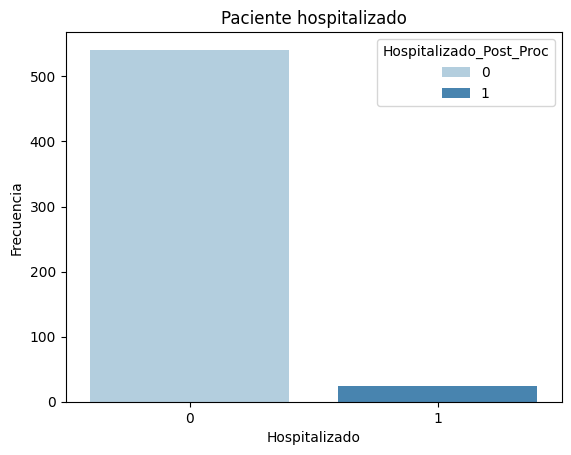

In [213]:
# Comprobamos como se distribuye nuestra variable de respuesta: 'Hospitalizado_Post_Proc'
sns.countplot(x='Hospitalizado_Post_Proc', data=data1, hue='Hospitalizado_Post_Proc', palette="Blues")
plt.title('Paciente hospitalizado')
plt.xlabel('Hospitalizado')
plt.ylabel('Frecuencia')
plt.show()

In [144]:
# Datos no balanceados
cantidades = data1['Hospitalizado_Post_Proc'].value_counts()
porcentajes = cantidades / len(data1) * 100
porcentajes

Hospitalizado_Post_Proc
NO    95.752212
SI     4.247788
Name: count, dtype: float64

Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

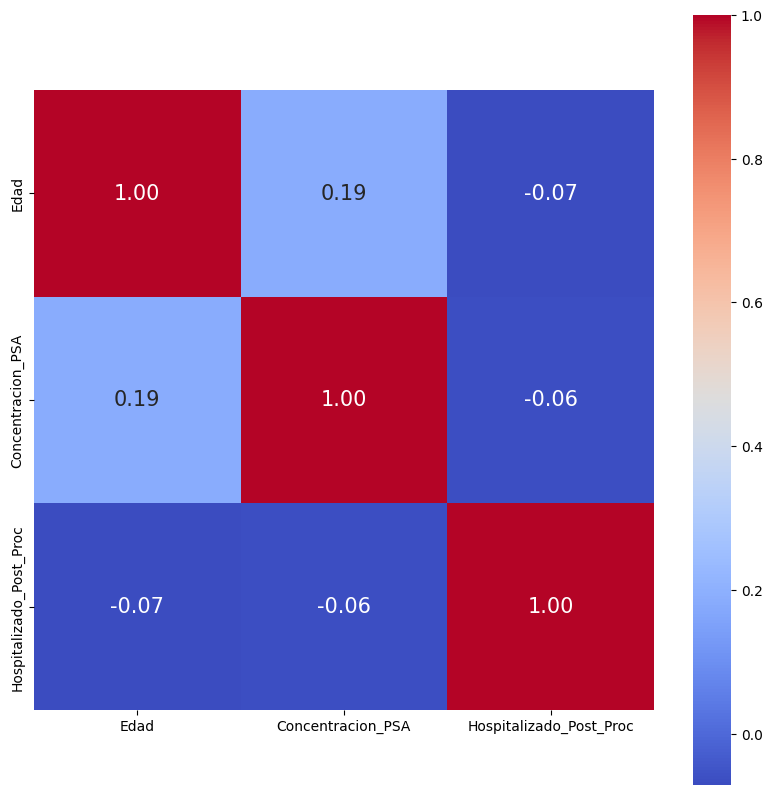

In [189]:
# Realizamos el mapa de calor para ver la correlación entre las variables

columnas_seleccionadas = ['Edad', 'Concentracion_PSA','Hospitalizado_Post_Proc']
nuevo_df = data1[columnas_seleccionadas]

corr = nuevo_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= nuevo_df.columns, 
           yticklabels= nuevo_df.columns,
           cmap= 'coolwarm')
plt.show() # No hay correlaciones 

In [214]:
def plot_corre_heatmap(corr):
    '''
    Definimos una función para ayudarnos a graficar un heatmap de correlación
    '''
    plt.figure(figsize=(10,8))
    sns.heatmap(corr, cbar = True,  square = False, annot=True, fmt= '.2f'
                ,annot_kws={'size': 15},cmap= 'coolwarm')
    plt.xticks(rotation = 45)
    plt.yticks(rotation = 45)
    # Arreglamos un pequeño problema de visualización
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()

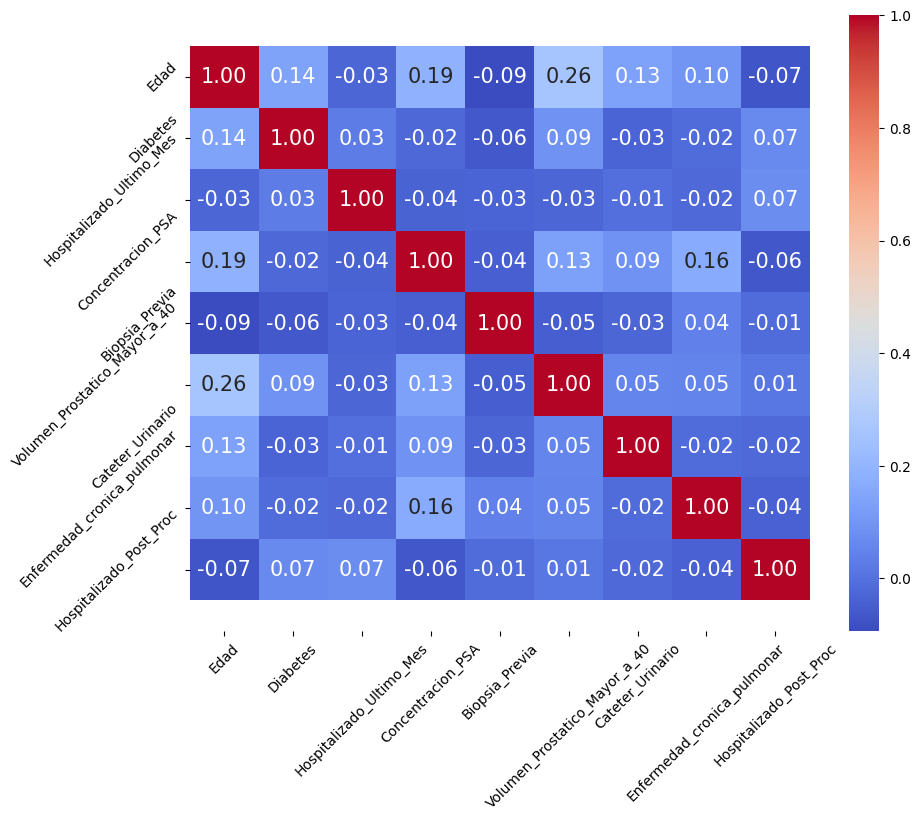

In [215]:
corr = data1.corr()
plot_corre_heatmap(corr)

Exporte la base de datos preparada en un archivo .csv para el modelamiento. 

In [217]:
data1.to_csv('data_lista.csv', index=False)